<a href="https://colab.research.google.com/github/11carlesnavarro/testing/blob/master/Carles_Navarro_A03_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import scipy
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pwd
!cd /content/
!mkdir airbnb/
!wget airbnb.csv https://raw.githubusercontent.com/leandroradusky/AdvancedStatistics/master/data/airbnb.csv

/content
mkdir: cannot create directory ‘airbnb/’: File exists
--2021-02-21 18:04:26--  http://airbnb.csv/
Resolving airbnb.csv (airbnb.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘airbnb.csv’
--2021-02-21 18:04:26--  https://raw.githubusercontent.com/leandroradusky/AdvancedStatistics/master/data/airbnb.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3177642 (3.0M) [text/plain]
Saving to: ‘airbnb.csv.1’

airbnb.csv.1        100%[===================>]   3.03M  20.1MB/s    in 0.2s    

2021-02-21 18:04:27 (20.1 MB/s) - ‘airbnb.csv.1’ saved [3177642/3177642]

FINISHED --2021-02-21 18:04:27--
Total wall clock time: 0.6s
Downloaded: 1 files, 3.0M in 0.2s (20.1 MB/s)


In [ ]:
!head airbnb.csv

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304
18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.4042,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312
23197,FORUM DELUXE 5 MINS WALK  CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210,3,51,2019-09-29,0.48,2,359
25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46
31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.4095,2.15938,Entire home/apt,60,1,182,2019-10-16,1.71,3

In [ ]:
airbnbPath = "/content/airbnb.csv"
df = pd.read_csv(airbnbPath, header = 0, index_col=False)

1. Classification

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210,3,51,2019-09-29,0.48,2,359
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46
4,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,60,1,182,2019-10-16,1.71,39,324


Let's split the data in two groups, training and test.

In [ ]:
Training_data = df.sample(n=1000,random_state=200)
Test_data = df.drop(Training_data.index)

1.1 **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(Training_data[["latitude", "longitude"]], Training_data[["neighbourhood_group"]])

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Testing accuracy
good_predictions = 0
bad_predictions = 0
for index, apartment in Test_data.iterrows():
  prediction = gnb.predict([[apartment["latitude"], apartment["longitude"]]])
  if prediction == apartment["neighbourhood_group"]:
    good_predictions += 1
  else:
    bad_predictions += 1

accuracy = good_predictions / (good_predictions + bad_predictions)
print("Naive Bayes accuracy:" , accuracy)



Naive Bayes accuracy: 0.8465616635783405


1.2 **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdnmforest = RandomForestClassifier()
rdnmforest.fit(Training_data[["latitude", "longitude"]], Training_data[["neighbourhood_group"]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
good_rndforest_predictions = 0
bad_rndforest_predictions = 0
for index, apartment in Test_data.iterrows():
  prediction = rdnmforest.predict([[apartment["latitude"], apartment["longitude"]]])
  if prediction == apartment["neighbourhood_group"]:
    good_rndforest_predictions += 1
  else:
    bad_rndforest_predictions += 1

accuracy = good_rndforest_predictions / (good_rndforest_predictions + bad_rndforest_predictions)
print("Ranfom Forest accuracy:" , accuracy)

Ranfom Forest accuracy: 0.9599547045501339


If we compare the both classifiers, we see that the Random Forest has much better accuracy than the Naive Bayes. 

Finally, we plot the apartments labeling the neighbourhood group, in order to better understand the results that we will obtain in the next section.

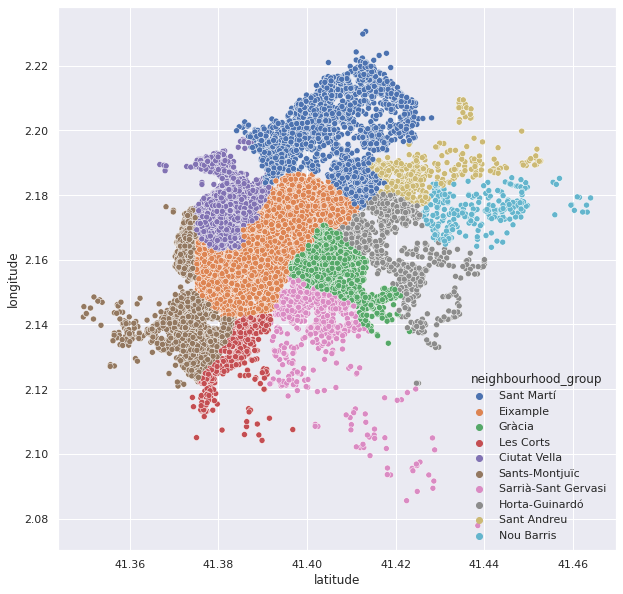

In [ ]:
sns.scatterplot (x = "latitude", y = "longitude", data = df, hue = "neighbourhood_group")

sns.set(rc={'figure.figsize':(9,9)})

**2. Clusterize the apartments according tot their prize and room type**

First we change categorical to numerical data. For the room type and neighbourhood group we will assign the numbers from lower to higher "exlusivity".


In [ ]:
# Changing room types by numbers
changing_room_type = {"room_type" : {"Entire home/apt": 4, "Private room": 2, "Hotel room": 3, "Shared room" : 1}}

In [ ]:
# Changing room types by numbers
working_df = df
working_df["room_type"] = working_df.room_type.astype(object)
working_df = working_df.replace(changing_room_type)


In [ ]:
# Check price means of each neighbourhood
print("Eixample price: ", df[working_df.neighbourhood_group == "Eixample"].price.mean())
print("Sarrià-Sant Gervasi price: ", df[working_df.neighbourhood_group == "Sarrià-Sant Gervasi"].price.mean())
print("Gràcia price: ", df[working_df.neighbourhood_group == "Gràcia"].price.mean())
print("Sant Martí price: ", df[working_df.neighbourhood_group == "Sant Martí"].price.mean())
print("Sants-Montjuic price: ", df[working_df.neighbourhood_group == "Sants-Montjuïc"].price.mean())
print("Les Corts price: ", df[working_df.neighbourhood_group == "Les Corts"].price.mean())
print("Ciutat Vella price: ", df[working_df.neighbourhood_group == "Ciutat Vella"].price.mean())
print("Horta-Guinardó price: ", df[working_df.neighbourhood_group == "Horta-Guinardó"].price.mean())
print("Sant Andreu price: ", df[working_df.neighbourhood_group == "Sant Andreu"].price.mean())
print("Nou Barris price: ", df[working_df.neighbourhood_group == "Nou Barris"].price.mean())

Eixample price:  186.5549933025748
Sarrià-Sant Gervasi price:  170.34081902245705
Gràcia price:  166.4472049689441
Sant Martí price:  131.40202391904324
Sants-Montjuic price:  97.71561574269995
Les Corts price:  95.09263657957244
Ciutat Vella price:  87.53773012340683
Horta-Guinardó price:  76.91097922848665
Sant Andreu price:  56.793785310734464
Nou Barris price:  43.32142857142857


In [ ]:
# Changing neighbourhood group by numbers
changing_neighbourhood = {"neighbourhood_group" : {"Eixample": 10, "Sarrià-Sant Gervasi": 9, "Gràcia": 8, "Sant Martí" : 7, "Sants-Montjuïc": 6,
                                                   "Les Corts": 5, "Ciutat Vella": 4, "Horta-Guinardó": 3, "Sant Andreu": 2, "Nou Barris": 1}}
working_df["neighbourhood_group"] = working_df.neighbourhood_group.astype(object)
working_df = working_df.replace(changing_neighbourhood)

Now, in order to have each feature in the same scale, we normalize the data that we are going to use to make the different clusters.

In [ ]:
def normalize(df, features):
    result = df.copy()
    for feature_name in df.columns:
      if feature_name in features:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / ( max_value - min_value)
    return result
working_df = normalize(working_df, ["room_type", "price", "neighbourhood_group", "latitude", "longitude", "availability_365", "number_of_reviews"])
working_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,0.666667,el Camp de l'Arpa del Clot,0.518476,0.705270,1.000000,0.008667,3,0.001441,2015-10-10,0.02,30,0.832877
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,1.000000,la Sagrada Família,0.477505,0.623502,1.000000,0.004000,1,0.028818,2019-10-19,0.25,30,0.854795
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),0.666667,el Besòs i el Maresme,0.545907,0.938265,1.000000,0.014000,3,0.073487,2019-09-29,0.48,2,0.983562
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,0.777778,la Vila de Gràcia,0.453481,0.514763,0.333333,0.002133,1,0.386167,2019-11-06,2.38,1,0.126027
4,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,0.777778,el Camp d'en Grassot i Gràcia Nova,0.523805,0.533944,1.000000,0.004000,1,0.262248,2019-10-16,1.71,39,0.887671


**Clustering price, latitude and longitude**

Fisrtly, we will do a clustering taking into account price and latitude and longitude, in order to see how it changes the price in the different zones. Later on, we will do the same but taking into account the neighbourhood to see if there are any differences.

We will use the following algorithm:

In [ ]:
import random

class K_Means:

  def __init__(self, k=3, tolerance=0.0001,max_iterations = 500):
      self.k = k
      self.tolerance = tolerance
      self.max_iterations = max_iterations

  def calc_distance (self,X1, X2):
    """ Calculate distances between points of numpy arrrays"""
    return (sum((X1 - X2)**2))**0.5

  def findClosestCentroids(self,ic,X):
    """ finds the closest centroid for each point """
    assigned_centroid = []
    for i in X:
        distance = []
        for j in ic:
           distance.append(self.calc_distance(i,j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

  def calc_centroids (self,clusters, X):
    """ Calculates the new centroids """
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis = 1)

    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c]
        cluster_mean = current_cluster[new_df.columns[:-1]].mean(axis=0).tolist()
        new_centroids.append(cluster_mean)
    return new_centroids   

  def fit(self, data, features):
      # convert the data to numpy array with the desired features
      initial_df = data
      data = data[features]
      X = np.array(data)
      # choose k random centroids
      init_centroids = random.sample(range(0, len(data)), self.k)
      init_centroids # These are the centroids indexes
      centroids = []
      for i in init_centroids:
          centroids.append(data.loc[i])
      centroids = np.array(centroids)

      previous_centroids = centroids
      
      # Start the iteratons
      for i in range(self.max_iterations):
          get_centroids = self.findClosestCentroids(centroids, X)
          centroids = self.calc_centroids(get_centroids, X)

          # Check if the tolerance is achieved
          centroids_distances = []
          for i in range(len(centroids)):
              centroids = np.array(centroids)
              previous_centroids = np.array(previous_centroids)
              centroids_distances.append(self.calc_distance(centroids[i],previous_centroids[i]))
              if sum(centroids_distances) < 3*self.tolerance:
                  break
          previous_centroids = centroids
            
      final_df = pd.concat([pd.DataFrame(initial_df), pd.DataFrame(get_centroids, columns = ['cluster'])], axis = 1)
      return final_df

But first, we have to decide how many k we will use to make the clusters. For that, we will use the within sum of squares of each cluster. To make this analysis I will use the KMeans algorithm from sklearn because it is faster than mine, and otherwise I would have to wait too long.

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(working_df[["latitude","longitude","price"]])
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

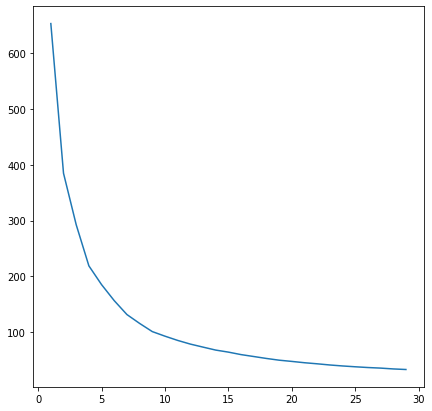

In [ ]:
plt.figure(figsize=(7,7))
number_clusters = range(1,30)
plt.plot(number_clusters, wcss)

In [ ]:
# Running KMeans with k=8

kmeans_position = K_Means(8).fit(working_df, ["latitude","longitude","price"])

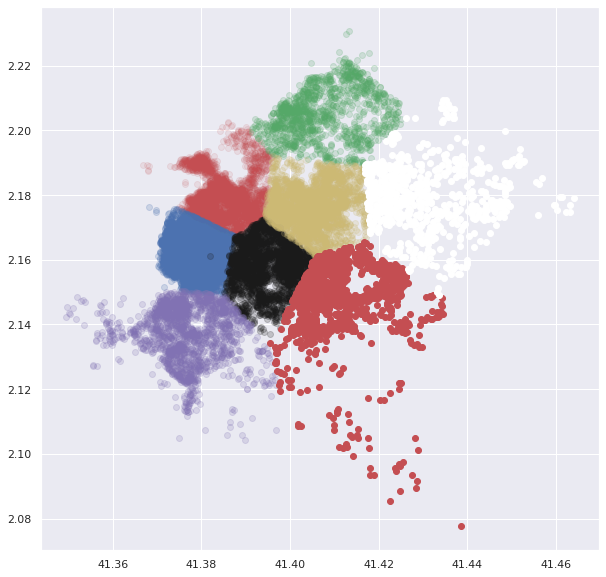

In [ ]:
plt.plot(df.latitude[kmeans_position.cluster == 0], df.longitude[kmeans_position.cluster == 0], "ro", alpha=0.1)
plt.plot(df.latitude[kmeans_position.cluster == 1], df.longitude[kmeans_position.cluster == 1], "bo", alpha=0.2)
plt.plot(df.latitude[kmeans_position.cluster == 2], df.longitude[kmeans_position.cluster == 2], "go", alpha=0.2)
plt.plot(df.latitude[kmeans_position.cluster == 3], df.longitude[kmeans_position.cluster == 3], "ko", alpha=0.2)
plt.plot(df.latitude[kmeans_position.cluster == 4], df.longitude[kmeans_position.cluster == 4], "mo", alpha=0.2)
plt.plot(df.latitude[kmeans_position.cluster == 5], df.longitude[kmeans_position.cluster == 5], "yo", alpha=0.2)
plt.plot(df.latitude[kmeans_position.cluster == 6], df.longitude[kmeans_position.cluster == 6], "ro", alpha=1)
plt.plot(df.latitude[kmeans_position.cluster == 7], df.longitude[kmeans_position.cluster == 7], "wo", alpha=1)

In [ ]:
print('Cluster 0 (Red):')
print (df[kmeans_position.cluster == 0].price.mean(), '\n')
print('Cluster 1 (Blue):')
print (df[kmeans_position.cluster == 1].price.mean(),'\n')
print('Cluster 2 (Green):')
print (df[kmeans_position.cluster == 2].price.mean(),'\n')
print('Cluster 3 (Black):')
print (df[kmeans_position.cluster == 3].price.mean(),'\n')
print('Cluster 4 (Magenta):')
print (df[kmeans_position.cluster == 4].price.mean(),'\n')
print('Cluster 5 (Yellow):')
print (df[kmeans_position.cluster == 5].price.mean(),'\n')
print('Cluster 6 (Hard Red):')
print (df[kmeans_position.cluster == 6].price.mean(),'\n')
print('Cluster 7 (White):')
print (df[kmeans.labels_ == 7].price.mean())


Cluster 0 (Red):
108.4722474977252 

Cluster 1 (Blue):
122.38093126385809 

Cluster 2 (Green):
133.57432432432432 

Cluster 3 (Black):
258.7952650883628 

Cluster 4 (Magenta):
93.47002997002997 

Cluster 5 (Yellow):
114.79400260756194 

Cluster 6 (Hard Red):
135.14977645305515 

Cluster 7 (White):
58.879641485275286


With this first analysis, using k=8 we can see that the data is splited in groups that more or less correspond to the different locations in Barcelona, being the clusters located at the city center and the known neighbourhoods like Eixample or Sarrià are more expensive on average

**Clustering neighbourhood and price**

Now we will cluster accodrding neighbourhood and price, in order to see if the neighbourhood have any influence and it is not only the geographical location what changes the prices. 

In [ ]:
wcss = []
for i in range(1,15):
    kmeans_neighbourhood = KMeans(i)
    kmeans_neighbourhood.fit(working_df[["neighbourhood_group","price"]])
    wcss_iter = kmeans_neighbourhood.inertia_
    wcss.append(wcss_iter)

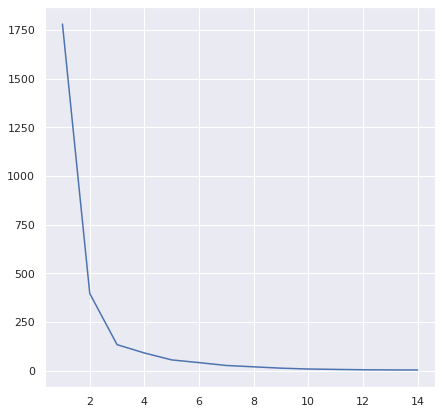

In [ ]:
plt.figure(figsize=(7,7))
number_clusters = range(1,15)
plt.plot(number_clusters, wcss)

In [ ]:
kmeans_neighbourhood = K_Means(6).fit(working_df, ["neighbourhood_group","price"])

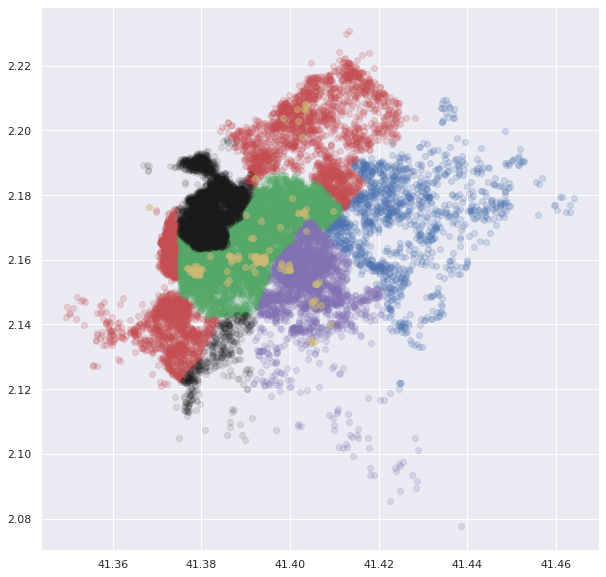

In [ ]:
plt.plot(df.latitude[kmeans_neighbourhood.cluster == 0], df.longitude[kmeans_neighbourhood.cluster == 0], "ro", alpha=0.2)
plt.plot(df.latitude[kmeans_neighbourhood.cluster == 1], df.longitude[kmeans_neighbourhood.cluster == 1], "bo", alpha=0.2)
plt.plot(df.latitude[kmeans_neighbourhood.cluster == 2], df.longitude[kmeans_neighbourhood.cluster == 2], "go", alpha=0.2)
plt.plot(df.latitude[kmeans_neighbourhood.cluster == 3], df.longitude[kmeans_neighbourhood.cluster == 3], "ko", alpha=0.1)
plt.plot(df.latitude[kmeans_neighbourhood.cluster == 4], df.longitude[kmeans_neighbourhood.cluster == 4], "mo", alpha=0.2)
plt.plot(df.latitude[kmeans_neighbourhood.cluster == 5], df.longitude[kmeans_neighbourhood.cluster == 5], "yo", alpha=0.5)


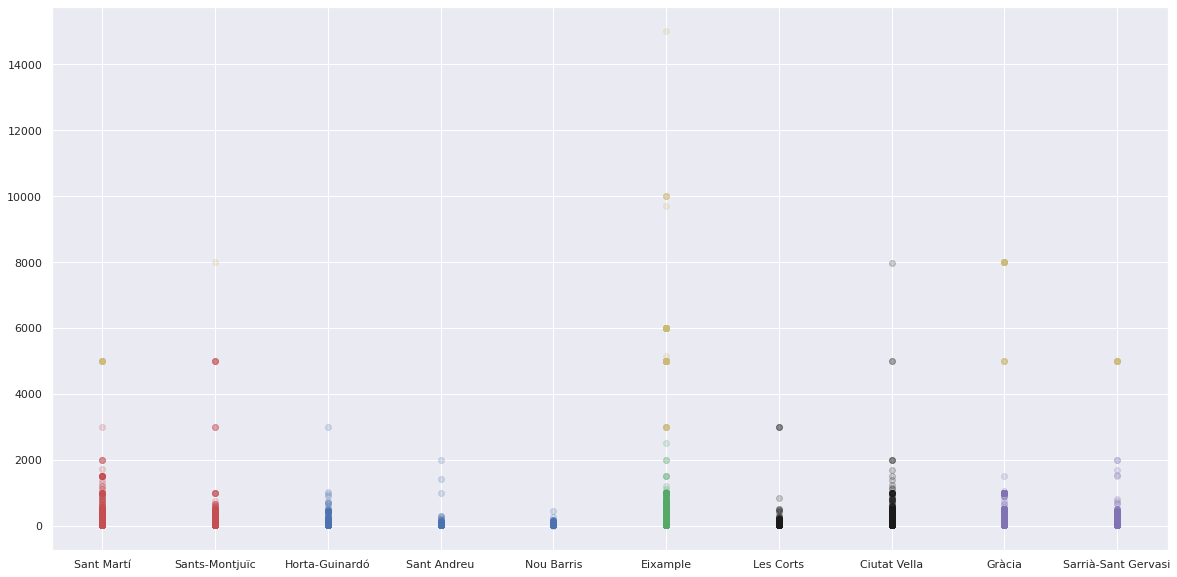

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(df.neighbourhood_group[kmeans_neighbourhood.cluster == 0], df.price[kmeans_neighbourhood.cluster == 0], "ro", alpha=0.2)
plt.plot(df.neighbourhood_group[kmeans_neighbourhood.cluster == 1], df.price[kmeans_neighbourhood.cluster == 1], "bo", alpha=0.2)
plt.plot(df.neighbourhood_group[kmeans_neighbourhood.cluster == 2], df.price[kmeans_neighbourhood.cluster == 2], "go", alpha=0.2)
plt.plot(df.neighbourhood_group[kmeans_neighbourhood.cluster == 3], df.price[kmeans_neighbourhood.cluster == 3], "ko", alpha=0.2)
plt.plot(df.neighbourhood_group[kmeans_neighbourhood.cluster == 4], df.price[kmeans_neighbourhood.cluster == 4], "mo", alpha=0.2)
plt.plot(df.neighbourhood_group[kmeans_neighbourhood.cluster == 5], df.price[kmeans_neighbourhood.cluster == 5], "yo", alpha=0.2)

In [ ]:
print ('Cluster 0 (Red):')
print (df[kmeans_neighbourhood.cluster == 0].price.mean(), '\n')
print ('Cluster 1 (Blue):')

print (df[kmeans_neighbourhood.cluster == 1].price.mean(),'\n')
print ('Cluster 2 (Green):')

print (df[kmeans_neighbourhood.cluster == 2].price.mean(),'\n')
print ('Cluster 3 (Black):')

print (df[kmeans_neighbourhood.cluster == 3].price.mean(),'\n')
print ('Cluster 4 (Magenta):')
print (df[kmeans_neighbourhood.cluster == 4].price.mean(),'\n')
print ('Cluster 5 (Yellow):')
print (df[kmeans_neighbourhood.cluster == 5].price.mean(),'\n')




Cluster 0 (Red:
102.4011486635741 

Cluster 1 (Blue:
64.734375 

Cluster 2 (Green:
118.8569706103994 

Cluster 3 (Black:
88.1306860551827 

Cluster 4 (Magenta:
106.16300439472633 

Cluster 5 (Yellow:
5679.3865546218485 



If we repeat the analysis but comparing prices and neighbourhoods we can see that there are different groups of prices deppending on the neighbourhood, but the differences between them are not so big except for **Cluster 5**, which has a mean of 5846 euros, this cluster might be composed by luxury apartments or hotels in the city center, since the yellow points are mainly located in neighbourhoods like Eixample, Sarrià or Gràcia, which are the expensive neighbourhoods of the city. 
Then we also have the **cluster 1 and 3** (Blue and Black) which are composed by a group of neighbouhoods that are more on the outskirts of the city and have lower prices than the other ones.

Now we will check if we can make clustering with the room types and prices.



In [ ]:
wcss = []
for i in range(1,15):
    kmeans_roomtype = KMeans(i)
    kmeans_roomtype.fit(working_df[["room_type","price"]])
    wcss_iter = kmeans_roomtype.inertia_
    wcss.append(wcss_iter)

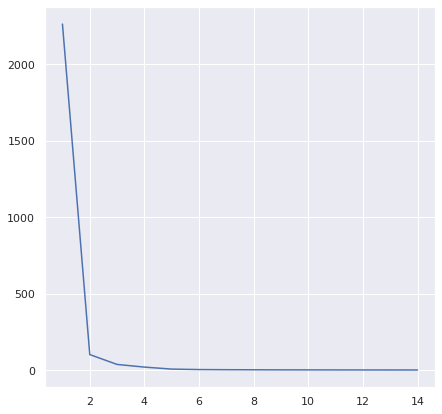

In [ ]:
plt.figure(figsize=(7,7))
number_clusters = range(1,15)
plt.plot(number_clusters, wcss)

In [ ]:
kmeans_roomtype = K_Means(4).fit(working_df, ["room_type","price"])

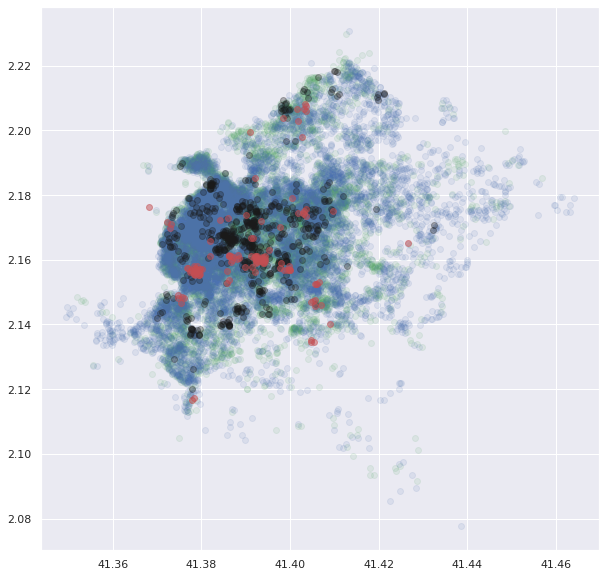

In [ ]:
plt.plot(df.latitude[kmeans_roomtype.cluster == 0], df.longitude[kmeans_roomtype.cluster == 0], "go", alpha=0.1)
plt.plot(df.latitude[kmeans_roomtype.cluster == 1], df.longitude[kmeans_roomtype.cluster == 1], "bo", alpha=0.1)
plt.plot(df.latitude[kmeans_roomtype.cluster == 2], df.longitude[kmeans_roomtype.cluster == 2], "ko", alpha=0.3)
plt.plot(df.latitude[kmeans_roomtype.cluster == 3], df.longitude[kmeans_roomtype.cluster == 3], "ro", alpha=0.5)

In [ ]:
print ('Cluster 0 (Green):')

print (df[kmeans_roomtype.cluster == 0].price.mean(), '\n')
print ('Cluster 1 (Blue):')

print (df[kmeans_roomtype.cluster == 1].price.mean(),'\n')
print ('Cluster 2 (Black):')

print (df[kmeans_roomtype.cluster == 2].price.mean(),'\n')
print ('Cluster 3 (Red):')

print (df[kmeans_roomtype.cluster == 3].price.mean(),'\n')

Cluster 0 (Green):
138.73593545573485 

Cluster 1 (Blue):
55.713039355144616 

Cluster 2 (Black):
298.7005163511188 

Cluster 3 (Red):
5506.361538461539 



Let's now make a count of the different kind of apartments on each group.

In [ ]:
print (' Cluster 0')
print ( df[kmeans_roomtype.cluster == 0].room_type.value_counts().to_string(),'\n' )
print (' Cluster 1 ')
print ( df[kmeans_roomtype.cluster == 1].room_type.value_counts().to_string(), '\n' )
print (' Cluster 2')
print ( df[kmeans_roomtype.cluster == 2].room_type.value_counts().to_string(), '\n' )
print (' Cluster 3')
print ( df[kmeans_roomtype.cluster == 3].room_type.value_counts().to_string(), '\n' )

 Cluster 0
Entire home/apt    9172 

 Cluster 1 
Private room    10387
Shared room       158 

 Cluster 2
Hotel room    581 

 Cluster 3
Entire home/apt    96
Hotel room         34 



What we can see here is that, with **k=4**, there is a cluster (**cluster 1**) that has only private and shared rooms and it's the cheapest one, as it was expected. And the apartments are more or less equaly spreaded within the city.

Then we have another group, **cluster 0**, that has only entire apartments and is also more or less spreaded within the city.

The **cluster 2**, that has only hotels, is the most expensive with a very high average price, this, as stated before, may be due to the presence of luxury hotels in the city center.

And finally, we have **cluster 3**, with an average price of 298 euros and composed by hotels and entire apartments. The apartments of this cluster are mostly located in the city center and are higher on average than the other cluster of entire apartments. With this, behavior, we can start to think that the price of the apartments not only depends on the location or the room type, but it is a combination of both. In order to analyse this we will do another cluster with the three factors.


**Clustering room type, price and neighbourhood**


In [ ]:
wcss = []
for i in range(1,30):
    kmeans_roomtype_position = KMeans(i)
    kmeans_roomtype_position.fit(working_df[["room_type","neighbourhood_group","price"]])
    wcss_iter = kmeans_roomtype_position.inertia_
    wcss.append(wcss_iter)

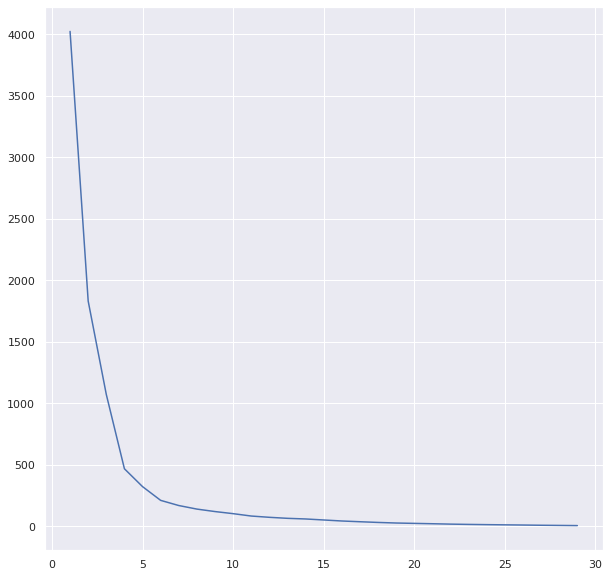

In [ ]:
number_clusters = range(1,30)
plt.plot(number_clusters, wcss)

In [ ]:
kmeans_roomtype_position = K_Means(7).fit(working_df,["room_type","neighbourhood_group", "price"])

In [ ]:
# Count the number of rooms each room type in each cluster
print (' Cluster 0')
cluster_0 = (df[kmeans_roomtype_position.cluster == 0].room_type.value_counts() )
print (cluster_0.to_string() , '\n')
print (' Cluster 1')
cluster_1 = ( df[kmeans_roomtype_position.cluster == 1].room_type.value_counts() )
print (cluster_1.to_string(), '\n')
print (' Cluster 2')
cluster_2 = ( df[kmeans_roomtype_position.cluster == 2].room_type.value_counts() )
print (cluster_2.to_string(), '\n')
print (' Cluster 3')

cluster_3 = ( df[kmeans_roomtype_position.cluster == 3].room_type.value_counts() )
print (cluster_3.to_string(), '\n')
print (' Cluster 4')

cluster_4 = ( df[kmeans_roomtype_position.cluster == 4].room_type.value_counts() )
print (cluster_4.to_string(), '\n')
print (' Cluster 5')

cluster_5 = ( df[kmeans_roomtype_position.cluster == 5].room_type.value_counts() )
print (cluster_5.to_string(), '\n')
print (' Cluster 6')

cluster_6 = ( df[kmeans_roomtype_position.cluster == 6].room_type.value_counts() )
print (cluster_6.to_string())

 Cluster 0
Private room    4174
Shared room       64 

 Cluster 1
Hotel room    454 

 Cluster 2
Entire home/apt    1231 

 Cluster 3
Entire home/apt    1974
Hotel room           46 

 Cluster 4
Private room    6213
Shared room       94
Hotel room        17 

 Cluster 5
Entire home/apt    3366 

 Cluster 6
Entire home/apt    2697
Hotel room           98


In [ ]:
data = {'Clusters': ['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5','Cluster 6'],
        'Average price': [df[kmeans_roomtype_position.cluster == 0].price.mean(), df[kmeans_roomtype_position.cluster == 1].price.mean(),
        df[kmeans_roomtype_position.cluster == 2].price.mean(), df[kmeans_roomtype_position.cluster == 3].price.mean(),
        df[kmeans_roomtype_position.cluster == 4].price.mean(), df[kmeans_roomtype_position.cluster == 5].price.mean(),
        df[kmeans_roomtype_position.cluster == 6].price.mean()],
        'Private rooms': [cluster_0[0], 0, 0, 0, cluster_4[0], 0,0],
        'Shared rooms': [cluster_0[1], 0, 0, 0, cluster_4[1], 0,0],
        'Entire apartment': [0, 0, cluster_2[0], cluster_3[0], 0, cluster_5[0], cluster_6[0]],
        'Hotel rooms': [0, cluster_1[0], 0, cluster_3[1], cluster_4[2], 0, cluster_6[1]]}
room_price_neigbouhood = pd.DataFrame(data, columns = ['Clusters', 'Average price', 'Private rooms', 'Shared rooms', 'Entire apartment', 'Hotel rooms'])
room_price_neigbouhood


,Clusters,Average price,Private rooms,Shared rooms,Entire apartment,Hotel rooms
0,Cluster 0,60.885795,4174,64,0,0
1,Cluster 1,786.627753,0,0,0,454
2,Cluster 2,198.758733,0,0,1231,0
3,Cluster 3,187.224752,0,0,1974,46
4,Cluster 4,52.304238,6213,94,0,17
5,Cluster 5,250.189245,0,0,3366,0
6,Cluster 6,121.078354,0,0,2697,98


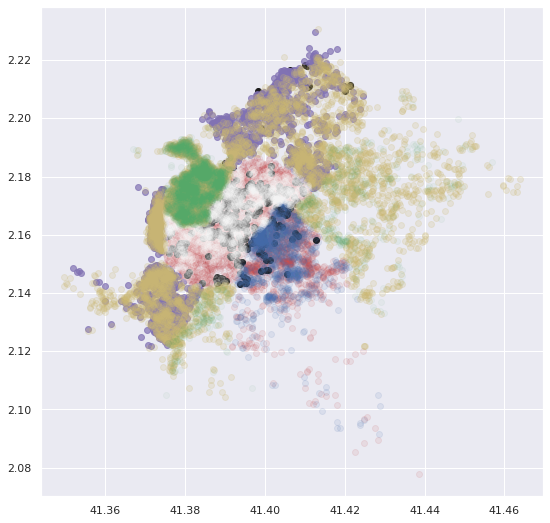

In [ ]:
plt.plot(df.latitude[kmeans_roomtype_position.cluster == 0], df.longitude[kmeans_roomtype_position.cluster == 0], "ro", alpha=0.1)
plt.plot(df.latitude[kmeans_roomtype_position.cluster == 1], df.longitude[kmeans_roomtype_position.cluster == 1], "ko", alpha=1)
plt.plot(df.latitude[kmeans_roomtype_position.cluster == 2], df.longitude[kmeans_roomtype_position.cluster == 2], "bo", alpha=0.1)
plt.plot(df.latitude[kmeans_roomtype_position.cluster == 3], df.longitude[kmeans_roomtype_position.cluster == 3], "mo", alpha=0.7)
plt.plot(df.latitude[kmeans_roomtype_position.cluster == 4], df.longitude[kmeans_roomtype_position.cluster == 4], "yo", alpha=0.2)
plt.plot(df.latitude[kmeans_roomtype_position.cluster == 5], df.longitude[kmeans_roomtype_position.cluster == 5], "wo", alpha=0.08)
plt.plot(df.latitude[kmeans_roomtype_position.cluster == 6], df.longitude[kmeans_roomtype_position.cluster == 6], "go", alpha=0.05)


With this last clustering we can have a better idea of the relation between price, room type and location within the city. Let's analyse the data we have obtained. 

To start, we can see that there are two clusters that contain all the private and shared rooms, **clusters 0 and 4** (red and yellow). These clusters are the cheapest ones as we could expect, and the ones in cluster 0 are located around Eixample, Les Corts, Sarrià and Gràcia, this could be due to two factors; first, because those are the areas where the universities of Barcelona are located, and most of the students are renting flats there, and second, as the renting is very expensive there, people that works and lives in the center tend more to share flats so the offer of shared and private rooms is higher. We also have some cheap hotel rooms in this group. For the cluster 4 we have private and shared rooms in neighbourhoods like Sant-Martí, Sant-Andreu, Nou-Barris or Horta, that are "innexpensive" neighbourhoods located more on the outskirts of the city, so this group is a little bit cheaper than the cluster 0.

On the other hand, we have the **cluster 5**, white on the map, this one is located in Eixample, which we have seen that is the most expensive neighbourhood of Barcelona, and is composed only by Entire apartments with an average price of 250 euros. This tells us that the neighbourhood gives some kind of prestige to the apartments, because this group fits perfect in the Eixample, and some points in this group are not necessarily physically close but, by the fact that they belong to Eixample, are in the expensive cluster.

And, if we talk about expensive clusters we have to talk about **cluster 1**, the most expensive, with an average price of 786 euros. In this cluster we have only hotels located in the city center, what makes the price increase a lot, we also have here, as we have seen previously, some hotels that are "outliers", since its price it's extremely expensive, which may affect the average price.

Then we have the **clusters 3 and 6** (magenta and green), which are composed by entire apartments and hotels. These clusters are mostly on Sant-Martí, Sants and Ciutat Vella their price is a lower than the price of cluster 5 that is located in L'Eixample, and while the cluster 3 is still about 187 euros, the cluster 6 on Ciutat Vella is where we can find the cheapest Entire rooms.

Finally, the **cluster 2** (blue), is located in Sant-Cugat and Gràcia, two famous and expensive neighbourhoods in the city of Barcelona. There we can find only Entire apartments and, although the price is not as high as the price of Eixample, we still have an average price of 187 euros.

**Clustering price and availability**

Let's see if the availability has any effect on the prices

In [ ]:
wcss = []
for i in range(1,30):
    kmeans_roomtype_availability_365 = KMeans(i)
    kmeans_roomtype_availability_365.fit(working_df[["availability_365","price"]])
    wcss_iter = kmeans_roomtype_availability_365.inertia_
    wcss.append(wcss_iter)

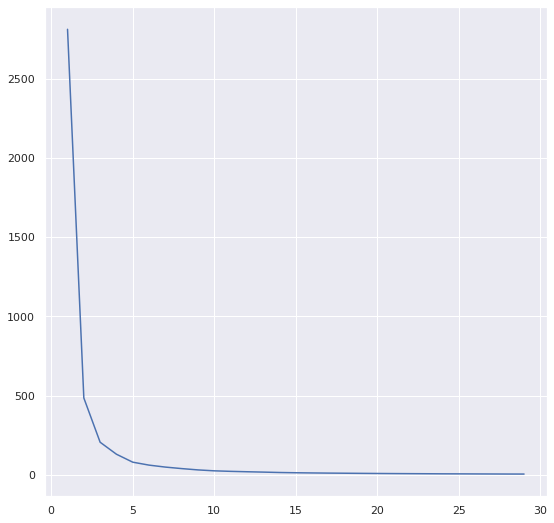

In [ ]:
number_clusters = range(1,30)
plt.plot(number_clusters, wcss)

In [ ]:
kmeans_roomtype_availability_365 = K_Means(5).fit(working_df,["availability_365", "price"])

In [ ]:
print (' Cluster 0')
cluster_0 = (df[kmeans_roomtype_availability_365.cluster == 0].room_type.value_counts() )
print (cluster_0.to_string() , '\n')
print (' Cluster 1')
cluster_1 = ( df[kmeans_roomtype_availability_365.cluster == 1].room_type.value_counts() )
print (cluster_1.to_string(), '\n')
print (' Cluster 2')
cluster_2 = ( df[kmeans_roomtype_availability_365.cluster == 2].room_type.value_counts() )
print (cluster_2.to_string(), '\n')
print (' Cluster 3')

cluster_3 = ( df[kmeans_roomtype_availability_365.cluster == 3].room_type.value_counts() )
print (cluster_3.to_string(), '\n')
print (' Cluster 4')

cluster_4 = ( df[kmeans_roomtype_availability_365.cluster == 4].room_type.value_counts() )
print (cluster_4.to_string(), '\n')

 Cluster 0
Private room       3520
Entire home/apt    1140
Shared room          46
Hotel room           27 

 Cluster 1
Entire home/apt    3568
Private room       2503
Hotel room          313
Shared room          64 

 Cluster 2
Entire home/apt    1504
Private room       1362
Hotel room           87
Shared room          19 

 Cluster 3
Private room       2257
Entire home/apt    1179
Hotel room           71
Shared room          18 

 Cluster 4
Entire home/apt    1877
Private room        745
Hotel room          117
Shared room          11 



(0.0, 15750.0)

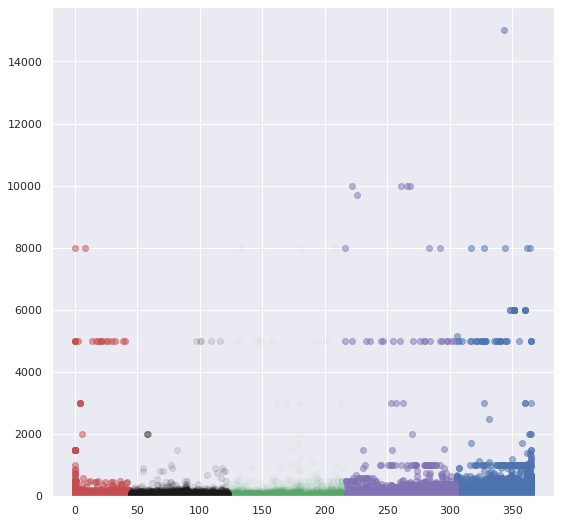

In [ ]:
plt.plot(df.availability_365[kmeans_roomtype_availability_365.cluster == 0], df.price[kmeans_roomtype_availability_365.cluster == 0], "ro", alpha=0.5)
plt.plot(df.availability_365[kmeans_roomtype_availability_365.cluster == 1], df.price[kmeans_roomtype_availability_365.cluster == 1], "bo", alpha=0.5)
plt.plot(df.availability_365[kmeans_roomtype_availability_365.cluster == 2], df.price[kmeans_roomtype_availability_365.cluster == 2], "go", alpha=0.03)
plt.plot(df.availability_365[kmeans_roomtype_availability_365.cluster == 3], df.price[kmeans_roomtype_availability_365.cluster == 3], "ko", alpha=0.1)
plt.plot(df.availability_365[kmeans_roomtype_availability_365.cluster == 4], df.price[kmeans_roomtype_availability_365.cluster == 4], "mo", alpha=0.5)

plt.ylim([0, None])



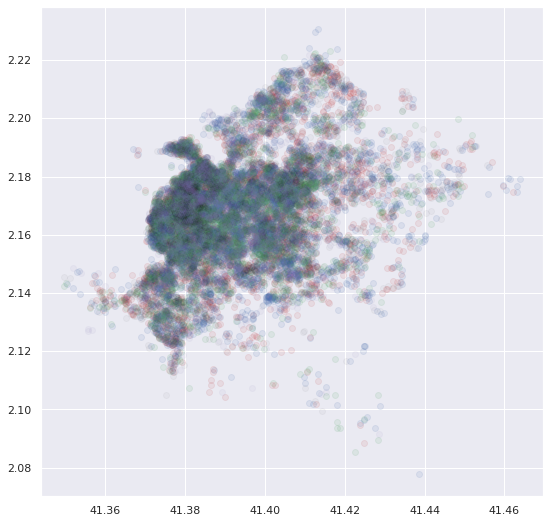

In [ ]:
plt.plot(df.latitude[kmeans_roomtype_availability_365.cluster == 0], df.longitude[kmeans_roomtype_availability_365.cluster == 0], "ro", alpha=0.1)
plt.plot(df.latitude[kmeans_roomtype_availability_365.cluster == 1], df.longitude[kmeans_roomtype_availability_365.cluster == 1], "bo", alpha=0.1)
plt.plot(df.latitude[kmeans_roomtype_availability_365.cluster == 2], df.longitude[kmeans_roomtype_availability_365.cluster == 2], "go", alpha=0.1)
plt.plot(df.latitude[kmeans_roomtype_availability_365.cluster == 3], df.longitude[kmeans_roomtype_availability_365.cluster == 3], "ko", alpha=0.03)
plt.plot(df.latitude[kmeans_roomtype_availability_365.cluster == 4], df.longitude[kmeans_roomtype_availability_365.cluster == 4], "mo", alpha=0.05)


We see that the availability is not something that affects the price a lot, but we still can see some kind of tendency on the apartments on the tails availability that are a little bit more expensive. Also, the availability and the location are not related as we can see on the plot, since the groups are spreaded.

3. **Conclusions**



*   The Random Forest Classifier has performed better than the Naive Bayes in this particular case.

*   The prices in the city of Barcelona depend on the neighbourhood, the more expensive neighbourhoods are Eixample, Sarrià and Gràcia. And the less expensive the ones at the outskirts like Nou Barris or Horta. 


*   The previous point is not the only one that influences on the price, we have to take also into account the room type, shared and private rooms tend to be less expensive while entire apartments and hotel rooms tend to be more expensive, being the hotel rooms the ones that cost the most.  

*   If one ones to rent in Barcelona he could look for cheap apartments looking for shared and private rooms, being the cheapest ones the rooms that are not in the neighbourhoods in the city center like Eixample, Sarrià or Gràcia, but the difference is not high. 

*   If one ones to rent and wants something better can look for Entire apartments, which follow the same trend than the rooms but with this ones the difference on the price is higher if he looks in non centered neighbourhoods. Being Eixample the most expensive, with an average price of 250 euros. Followed by Sarrià and Gràcia with a price of ~189 euros. And with prices around 120 euros in neighbourhoods like Ciutat Vella, Horta or Les Corts.

*   Finally, if someone looks for exclusivity, he can find very exclusive hotels on the expensive neighbourhoods, finding hotels that can even cost 10.000 euros per night. 


*   The price is not highly affected by the availability, although normally the very expensive apartments have or very low or very high availability. This may be due the expensive houses will be rent by rich people who will stay only some days for working or whatever, or who will stay for a long period. But will not rent like students or people with average salaries who will be changing the house or moving to another city for working or economic reasons. 


 

